In this notebook, I will run a MC simulation to valuate a Forward-Start option.  This is done by simulating a path to time $T_k$ where we determine the strike, then proceeding to finish the path until maturity $T$, i.e., $T-T_k$ time left where $T>T_k$.  Then calculate the discounted payoff and iterate this process and find the mean to reduce variance.  Antithetical sampling techniques can be used to further reduce variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Function for running one MC simulation for Forward-Start European Call valuation.

In [61]:
def forwardstart_valuation(S0, Tk, T, u, r, q, v, n):
  """
  S0 = spot
  Tk = time until spot = strike
  T = maturity
  u = drift
  r = discount factor
  q = dividend yield
  v = volatility
  n = number of simulations
  """
  Z1 = np.random.randn(n)
  Z2 = np.random.randn(n)
  STk = S0 * np.exp((u - q - (v**2)/2)*Tk + v*Z1*np.sqrt(Tk))
  ST = STk * np.exp((r - q - (v**2)/2)*(T-Tk) + v*Z2*np.sqrt(T-Tk))
  disc_payoff = np.exp(-r*T)*np.maximum(ST - STk, 0)
  return np.mean(disc_payoff)

Example.

In [72]:
S0, Tk, T, u, r, q, v, n = 100,0.5, 1, 0.08, 0.05,0.02,0.30, 10000

M = 100000 #number of MC simulations run
values = np.array([forwardstart_valuation(S0, Tk, T, u, r, q, v, n) for _ in range(M)])

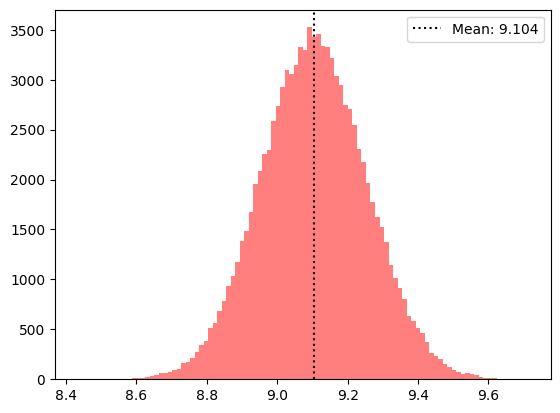

In [74]:
plt.hist(values,bins = 100, color = 'red', alpha = 0.5);
plt.axvline(np.mean(values), label= f'Mean: {np.mean(values):.3f}', color='black', linestyle=':');
plt.legend();

In [78]:
# variance in prices
print(f'Var(Prices): {np.var(values):.4f}')

Var(Prices): 0.0223
